# Decision Tree - Undersampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier #Import scikit-Tree For Decision Tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix #import Confusion Matrix
from sklearn.model_selection import train_test_split # Splitting the data
from sklearn import preprocessing # Normalizing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import time


D:\Users\sourc\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df_o = pd.read_csv("../data/processed/data_undersampled.csv",index_col=0)

In [3]:
# Normalizing the data
x = df_o.values #returns a numpy array
col = df_o.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_n = pd.DataFrame(x_scaled, columns = col)

# df_n

In [4]:
X = df_o.drop("isFirstDown",1)   #Feature Matrix
y = df_o["isFirstDown"]          #Target Variable

In [5]:
# from sklearn.model_selection import train_test_split # Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=72)

numDimensions = X_test.shape[1]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8370, 27)
(3588, 27)
(8370,)
(3588,)


In [6]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(criterion="entropy")

In [7]:
# Train Decision Tree Classifer
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
#Predict the response for test dataset
y_pred = dtree.predict(X_test)

In [9]:
accText = 'Decision Tree, Undersampled'

In [10]:
# Model Accuracy, how often is the classifier correct?

# accuracy: (tp + tn) / (p + n)
accuracy = (accuracy_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Accuracy',accuracy))
# precision tp / (tp + fp)
precision = (precision_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Precision',precision))
# recall: tp / (tp + fn)
recall = (recall_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('Recall',recall))
# f1: 2 tp / (2 tp + fp + fn)
f1 = (f1_score(y_test, y_pred)).astype('float64')
print('{:>10}: {:0.2%}'.format('F1 score',f1))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = (auc(false_positive_rate, true_positive_rate)).astype('float64')
print('{:>10}: {:0.2%}'.format('ROC score',roc_auc))

acc = pd.read_csv("../data/external/accuracies.csv", index_col=0)
acc.at[accText, 'Accuracy'] = (accuracy)
acc.at[accText, 'Precision'] = (precision)
acc.at[accText, 'Recall'] = (recall)
acc.at[accText, 'F1'] = (f1)
acc.at[accText, 'ROC'] = (roc_auc)
acc.to_csv("../data/external/accuracies.csv")

  Accuracy: 63.60%
 Precision: 62.69%
    Recall: 64.46%
  F1 score: 63.56%
 ROC score: 63.61%


In [11]:
#Present Confusion Matrix to show accuracy
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:

[[1139  628]
 [ 678 1143]]

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1821
           1       0.63      0.64      0.64      1767

    accuracy                           0.64      3588
   macro avg       0.64      0.64      0.64      3588
weighted avg       0.64      0.64      0.64      3588



In [12]:
features = list(X)
#features

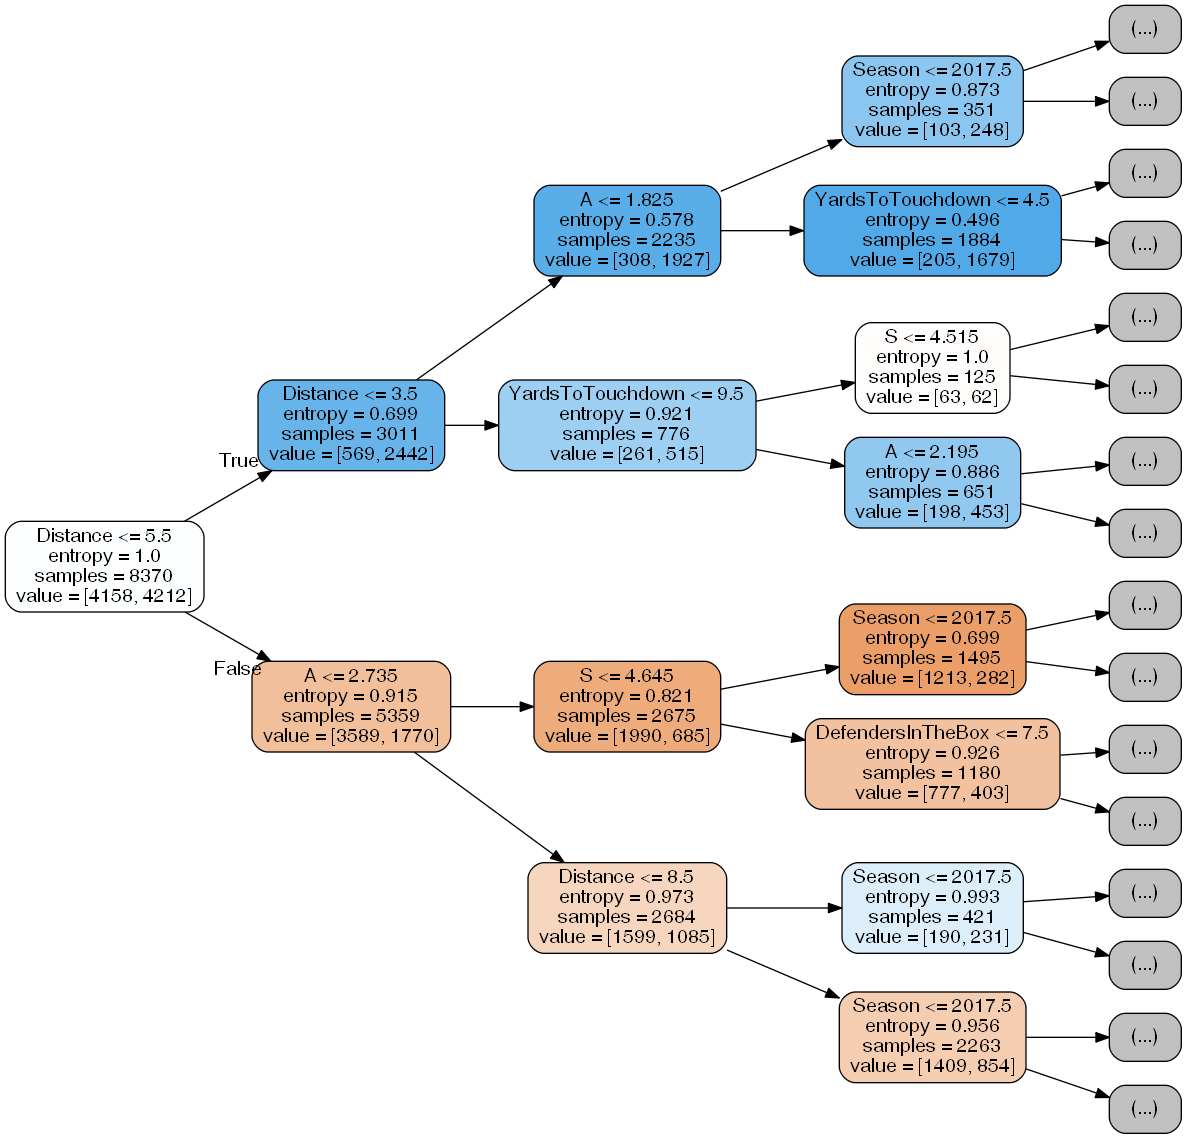

In [13]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True,rotate=True, max_depth=3)

import pydot
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png(), width=7860, height=2160)

In [14]:
# List of values to try for max_depth:
max_depth_range = list(range(1, numDimensions + 1))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)    
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    
pd.DataFrame(accuracy)

,0
0,0.729097
1,0.729097
2,0.727146
3,0.733278
4,0.726589
5,0.732999
6,0.731048
7,0.718506
8,0.716834
9,0.707358


In [15]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(5)

,feature,importance
21,Distance,0.244
10,A,0.112
23,S,0.097
9,Y,0.082
26,YardsToTouchdown,0.073
